In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 26 17:45:12 2019

@author: HP
"""
import pandas as pd
import numpy as np

In [2]:
#first of all we need load data therefore we should clean unordered data
#this function labels each data based on '#' - hash each hash has own features and labels

def Load_Data_Function(filename):
    data = pd.DataFrame(columns = ['L_stands','Values']) #loading data into dataframe
    with open(filename) as txtFile: #opening files
        for each, stand in enumerate(txtFile): #
            L_stands, Values = stand.split('#')
            Values = [float(V.strip()) for V in Values.split(';')]
            data.loc[each] = [L_stands, Values]
            each = each + 1
    data.iloc[:,0] = data.iloc[:,0].astype(np.int)
    return data           

In [3]:
#LOAD DATA + 
data_train = Load_Data_Function('Train.txt')
data_test = Load_Data_Function('Test.txt')
data_cv = Load_Data_Function('Cross_Validation.txt')

In [4]:
def List_Function(data):
    return np.array(data.values.tolist())

def Values_Function(data):
    return data.values

In [5]:
#loading features of each data to variables
data_train_X = List_Function(data_train.iloc[:,1])
data_test_X = List_Function(data_test.iloc[:,1])
data_cv_X = List_Function(data_cv.iloc[:,1])

#loading labels of each data to variables
data_train_y = Values_Function(data_train.iloc[:,0])
data_test_y = Values_Function(data_test.iloc[:,0])
data_cv_y = Values_Function(data_cv.iloc[:,0])

In [6]:
#NEURAL NETWORKS + 
from sklearn.neural_network import MLPClassifier as NT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [7]:
MLP_CLF = NT(hidden_layer_sizes=(100,100,100), alpha=0.0001) 
MLP_CLF.fit(data_train_X, data_train_y) #finding coefficients 
#prediction 
y_pred = MLP_CLF.predict(data_test_X)
#finding accurrracy percentage
MLP_CLF_AC_1 = round(accuracy_score(data_test_y, y_pred),4)
print('Evaluating through test_data', MLP_CLF_AC_1)
print('Accurracy:', MLP_CLF_AC_1 * 100, '%')

Evaluating through test_data 0.9713
Accurracy: 97.13000000000001 %


[[34  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  0  0]
 [ 0  0  1 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 51  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 48  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 43  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 47  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

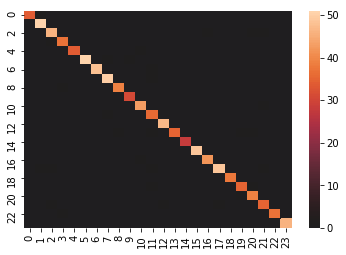

In [8]:
#confusion matrix
c_m = confusion_matrix(data_test_y, y_pred)
print(c_m)
#ploting
sns.heatmap(c_m, center=True)


In [9]:
#let just give several different hidden layer size and alphas
H_l = [50,150,250]
A = [0.001, 0.0001]

In [10]:
#this function choose best score through cross validation data
#based on given hidden layer size and alphas
def High_Score_Function_NT(hidden, a_v, X_tr, y_tr, X_cv, y_cv):      
    _sc = 0
    _hidden =[0] #empty
    _a_v = [0] #empty
    for i in hidden:
        for j in a_v :
            classifier = NT(hidden_layer_sizes=i, alpha=j)
            classifier.fit(X_tr, y_tr) # findig coefficients 
            sc = classifier.score(X_cv, y_cv) #tuning paramaters
            if sc > _sc: #choose high score
                _hidden = i #best hidden layer size 
                _a_v = j #best alpha
                _sc = sc  #best score
            print('Hidden_layer_size =', i,'alpha =', j , 'Score =', sc)
    return _hidden, _a_v

In [11]:
h_l, a_v = High_Score_Function_NT(H_l, A, data_train_X , data_train_y, data_cv_X, data_cv_y) 

Hidden_layer_size = 50 alpha = 0.001 Score = 0.9712871287128713
Hidden_layer_size = 50 alpha = 0.0001 Score = 0.9742574257425742
Hidden_layer_size = 150 alpha = 0.001 Score = 0.9821782178217822
Hidden_layer_size = 150 alpha = 0.0001 Score = 0.9841584158415841
Hidden_layer_size = 250 alpha = 0.001 Score = 0.9851485148514851
Hidden_layer_size = 250 alpha = 0.0001 Score = 0.9831683168316832


In [12]:
MLP_CLF = NT(hidden_layer_sizes = h_l, alpha = a_v) #best alpha and best hidden layer size
MLP_CLF.fit(data_train_X, data_train_y) #finding coefficients 

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=250, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [13]:
#finding accurrracy percentage 
MLP_CLF_AC_2 = round(MLP_CLF.score(data_test_X, data_test_y),4)
print('Evaluating through test_data', MLP_CLF_AC_2)
print('Accurracy:', MLP_CLF_AC_2 * 100, '%')

Evaluating through test_data 0.9742
Accurracy: 97.42 %


In [14]:
# Support Vector Machines (SVM) + 
from sklearn.svm import SVC

In [22]:
SVC_CLF = SVC(kernel = 'linear', random_state = 0)
SVC_CLF.fit(data_train_X, data_train_y)
# Predicting the Test set results
y_pred = SVC_CLF.predict(data_test_X)
#finding accurracy_score
SVC_AC_1 = round(accuracy_score(data_test_y, y_pred),4)
print('Evaluating through test_data:', SVC_AC_1)
print('Accurracy:', SVC_AC_1 * 100, '%')

Evaluating through test_data: 0.9604
Accurracy: 96.04 %


In [23]:
from sklearn.svm import LinearSVC as SV
#let just give several different penalty paramater C  
C = [0.001, 0.01, 0.1, 1]

In [24]:
#this function choose best score through cross validation data
#based on given penalty paramaeter C
def High_Score_Function_SVC(C, X_tr, y_tr, X_cv, y_cv):
     _sc = 0
     _C =[0]
     for i in C:
        classifier = SV(C=i)
        classifier.fit(X_tr, y_tr)
        sc = classifier.score(X_cv, y_cv) #tuning cross validation paramaters
        if sc > _sc:
            _C = i #finding best penalty parameter
            _sc = sc
        print('C =', i,'Score =', sc)
     return _C

In [25]:
_c = High_Score_Function_SVC(C, data_train_X , data_train_y, data_cv_X, data_cv_y)     

C = 0.001 Score = 0.9217821782178218
C = 0.01 Score = 0.903960396039604
C = 0.1 Score = 0.8752475247524752
C = 1 Score = 0.8801980198019802


In [26]:
SVC_CLF = SV(C =_c)
SVC_CLF.fit(data_train_X, data_train_y) 
SVC_AC_2 = round(SVC_CLF.score(data_test_X, data_test_y),4)
print('Evaluating through test_data:', SVC_AC_2)
print('Accurracy:', SVC_AC_2 * 100, '%')

Evaluating through test_data: 0.893
Accurracy: 89.3 %


In [27]:
# DECISION TREE +
from sklearn.tree import DecisionTreeClassifier as DT

In [34]:
# Fitting Decision Tree Classification to the Training set
DT_CLF = DT(criterion = 'entropy', random_state = 0)
DT_CLF.fit(data_train_X, data_train_y)
# Predicting the Test set results
y_pred = DT_CLF.predict(data_test_X)
#finding accurracy_score
DT_AC_1 = round(accuracy_score(data_test_y, y_pred),4)
print('Evaluating through test_data:', DT_AC_1)
print('Accurracy:', DT_AC_1 * 100, '%')

Evaluating through test_data: 0.7909
Accurracy: 79.09 %


In [35]:
#let just give several different max_depth and min_samples_split  
max_d = [16, 28]
min_s = [6, 12]

In [36]:
#this function choose best score through cross validation data
#based on given different max_depth and min_samples_split 
def High_Score_Function_DT(max_d, min_s,  X_tr, y_tr, X_cv, y_cv):
    _sc = 0
    for i in max_d:
        for j in min_s:
            classifier = DT(max_depth=i, min_samples_split=j)
            classifier.fit(X_tr, y_tr)
            sc = classifier.score(X_cv, y_cv)
            if sc > _sc:
                _d = i 
                _s = j
                _sc = sc
                print('max_depth =',i,'min_samples =',j,'Score =',sc)
    return _d, _s

In [37]:
_d, _s = High_Score_Function_DT(max_d, min_s, data_train_X , data_train_y, data_cv_X, data_cv_y)

max_depth = 16 min_samples = 6 Score = 0.7633663366336634
max_depth = 28 min_samples = 6 Score = 0.7712871287128713


In [38]:
DT_CLF = DT(max_depth = _d, min_samples_split = _s)
DT_CLF.fit(data_train_X, data_train_y) 
DT_AC_2 = round(DT_CLF.score(data_test_X, data_test_y),4)
print('Evaluating through test_data:', DT_AC_2)
print('Accurracy:', DT_AC_2 * 100, '%')

Evaluating through test_data: 0.7611
Accurracy: 76.11 %


In [39]:
#EXTRA 
#First step merging all data
data_merged = data_train.append(data_cv, ignore_index = True).append(data_test, ignore_index = True)

In [40]:
#after merging data now this function will devide data into 3 parts
#60% for train, 20 % for test, and 20% for Cross validation
#then finding accuracy

def Average_Function(data, classifier):
    m = len(data)
    data_cv_sc = []
    data_test_sc = []
    
    for each in range(10):
        np.random.seed(each) #different random numbers into array
        index = np.arange(m)
        np.random.shuffle(index) #shuffle
        t = int(0.6 * m) # 60% data will be for training
        v = int(0.8 * m) # 20% for cross and 20 % for test
        
        train = index[:t]#60%
        cv = index[t:v] #20% 
        test = index[v:] #20%
        
        #loading data 
        data_train = data.loc[train]
        data_cv = data.loc[cv]
        data_test = data.loc[test]
        
        #features and values
        data_train_X = List_Function(data_train.iloc[:,1])
        data_test_X = List_Function(data_test.iloc[:,1])
        data_cv_X = List_Function(data_cv.iloc[:,1])
        
        #labels
        data_train_y = Values_Function(data_train.iloc[:,0])
        data_test_y = Values_Function(data_test.iloc[:,0])
        data_cv_y = Values_Function(data_cv.iloc[:,0])
        
        #finding accuracy for evaluating average performance
        classifier.fit(data_train_X, data_train_y)
        data_cv_sc.append(classifier.score(data_cv_X, data_cv_y))
        data_test_sc.append(classifier.score(data_test_X, data_test_y))
    
    return sum(data_cv_sc)/10, sum(data_test_sc)/10

In [41]:
#FOR NEURAL NETWORKS + 
average_cv_sc_MLP, average_test_sc_MLP = Average_Function(data_merged, MLP_CLF)
print('Cross Validation score:' , average_cv_sc_MLP, ' Test score:', average_test_sc_MLP )
print('Cross Validation accuracy:' , round(average_cv_sc_MLP * 100,4),'%', ' Test sacuracy:', round(average_test_sc_MLP * 100,4),'%' )

Cross Validation score: 0.9742942050520058  Test score: 0.9730064388311044
Cross Validation accuracy: 97.4294 %  Test sacuracy: 97.3006 %


In [42]:
#FOR SVM +
average_cv_sc_SVC, average_test_sc_SVC = Average_Function(data_merged, SVC_CLF)
print('Cross Validation score:' , average_cv_sc_SVC, ' Test score:', average_test_sc_SVC )
print('Cross Validation accuracy:' , round(average_cv_sc_SVC * 100,4),'%', ' Test accuracy:', round(average_test_sc_SVC * 100,4),'%' )

Cross Validation score: 0.9011887072808322  Test score: 0.9034670629024271
Cross Validation accuracy: 90.1189 %  Test sacuracy: 90.3467 %


In [43]:
#FOR DECISION TREE +  
average_cv_sc_DT, average_test_sc_DT = Average_Function(data_merged, DT_CLF)
print('Cross Validation score:' , average_cv_sc_DT, ' Test score:', average_test_sc_DT )
print('Cross Validation accuracy:' , round(average_cv_sc_DT * 100,4),'%', ' Test acurracy:', round(average_test_sc_DT * 100,4),'%' )


Cross Validation score: 0.7512630014858841  Test score: 0.7478454680534918
Cross Validation accuracy: 75.1263 %  Test sacuracy: 74.7845 %
